In [1]:
# conda create --name pes-env python=3.11.4 numpy scipy matplotlib pyserial control ipykernel

import time
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from SerialStream import SerialStream

In [2]:
port = "/dev/ttyUSB0"  # "COM12"
baudrate = int(2e6)

# Initialize the SerialStream object
try:
    serialStream.reset()
    print("Resetting existing serialStream object.")
except Exception as e:
    serialStream = SerialStream(port, baudrate)
    print("Creating new serialStream object.")

# Starting the stream
serialStream.start()
while serialStream.is_busy_flag():
    time.sleep(0.1)

# Accessing the data
try:
    data = serialStream.get_data()
except Exception as e:
    print("Data Stream not triggered.")
    exit()

# Save the data
file_name = "data_00.npz"
np.savez(file_name, **data)

# Load the data
loaded = np.load(file_name)
data = {"time": loaded["time"], "values": loaded["values"]}

Creating new serialStream object.
SerialStream waiting for 3.00 seconds...
SerialStream started, logging 3 signals
             logging for 2.00 seconds...
             logging for 4.00 seconds...
SerialStream ended with 0.30 seconds timeout
             logged for 4.00 seconds
             measured 609 datapoints


(0.0, 24000.000000001088)

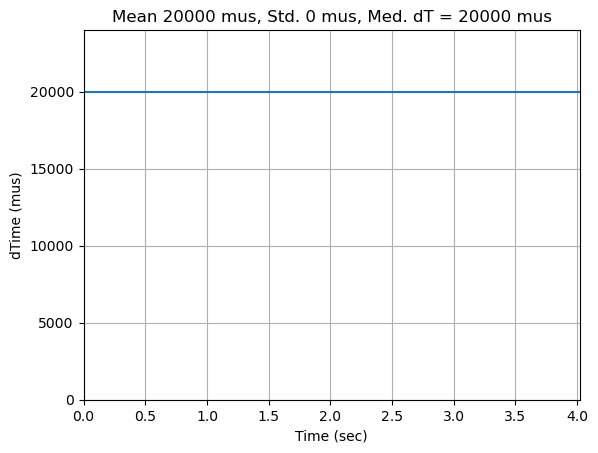

In [3]:
# Evaluate time

Ts = np.mean(np.diff(data["time"]))

plt.figure(1)
plt.plot(data["time"][:-1], np.diff(data["time"]) * 1e6)
plt.grid(True)
plt.title(f"Mean {np.mean(np.diff(data['time']) * 1e6):.0f} mus, " f"Std. {np.std(np.diff(data['time']) * 1e6):.0f} mus, " f"Med. dT = {np.median(np.diff(data['time']) * 1e6):.0f} mus")
plt.xlabel("Time (sec)")
plt.ylabel("dTime (mus)")
plt.xlim([0, data["time"][-2]])
plt.ylim([0, 1.2 * np.max(np.diff(data["time"]) * 1e6)])

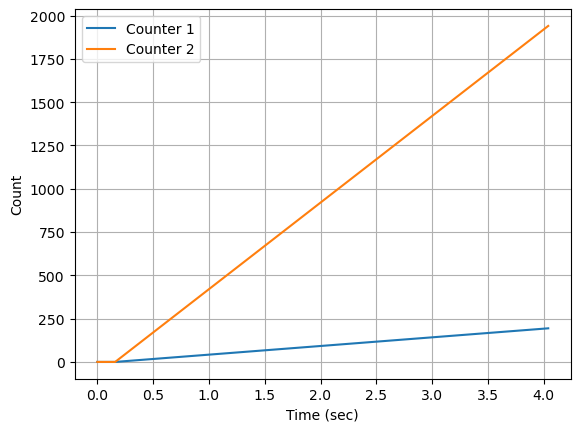

In [4]:
# Evaluate the data

# Defining the indices for the data columns
ind = {}
ind["cntr_1"] = 0
ind["cntr_2"] = 1

plt.figure(2)
plt.plot(data["time"], data["values"][:, ind["cntr_1"]], label="Counter 1")
plt.plot(data["time"], data["values"][:, ind["cntr_2"]], label="Counter 2")
plt.grid(True)
plt.xlabel("Time (sec)")
plt.ylabel("Count")
plt.legend()